### Place the first random centroids.
In this case we want to generate 3 random clusters, so we create 3 random centroids

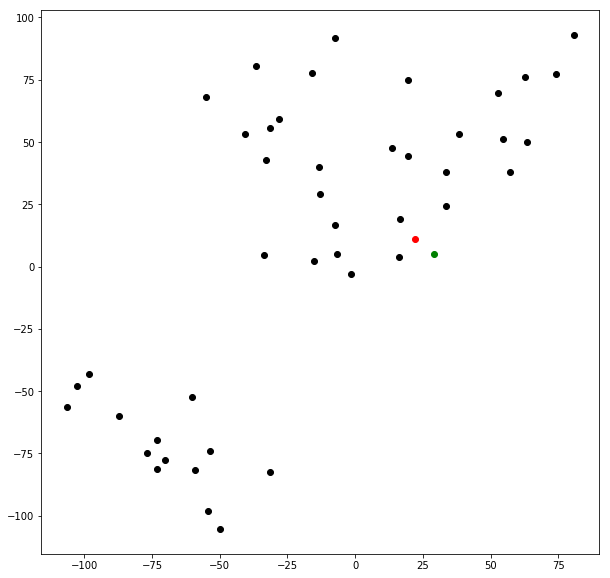

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

file = r'ATaleOfTwoCities_Coordinates.csv'
df = pd.read_csv(file)

np.random.seed(180)
k = 2

centroids = {}

for i in range(0,k):
    centroids[i+1] = [np.random.randint(0, 80), np.random.randint(0, 80)]

plt.figure(figsize=(10, 10))

plt.scatter(df['x'], df['y'], color='k')

colmap = {1: 'r', 2: 'g', 3: 'b'}

for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])
    
plt.show()

#### Get the distance from every point to every centroid.
So, the cluster of the point will be the one who's centroid is the closest one.

           x          y  d_centroid_1  d_centroid_2  closest color
0  33.465010  24.183346     17.471321     19.696118        1     r
1  57.301495  37.799605     44.321714     43.321919        2     g
2  63.597178  50.062750     57.063330     56.812113        2     g
3  74.306206  77.170313     84.347196     85.212713        1     r
4  52.783206  69.545695     66.145326     68.787991        1     r


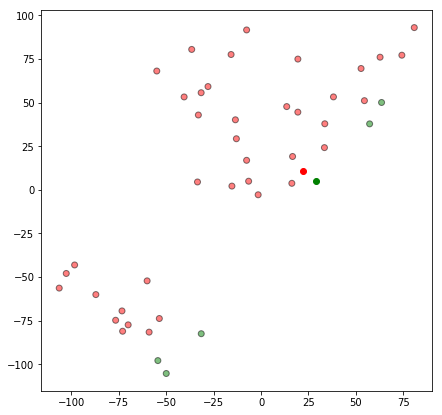

In [22]:
def assignment(df, centroids):
    centroid_distance_cols = []
    for i in centroids.keys():
        # calculate the distance
        distance = np.sqrt((df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2)
        key = 'd_centroid_' + str(i)
        df[key] = distance
        
    for i in centroids.keys():
        centroid_distance_cols.append('d_centroid_' + str(i))
        
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('d_centroid_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

distances = assignment(df, centroids)
print(distances.head(5))

plt.figure(figsize=(7, 7))
plt.scatter(distances['x'], distances['y'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])

plt.show()

####  Get the mean of the clusters in order to calculate the new centroid


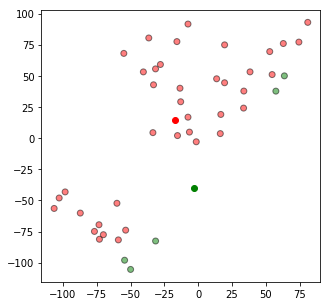

In [23]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])
    
plt.show()


#### Repeat until the the points doesn't change of cluster anymore.

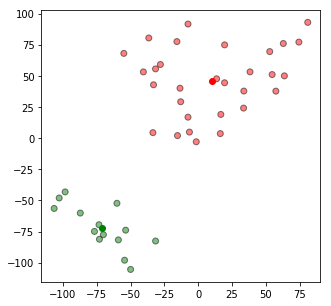

In [24]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])
plt.show()